In [1]:
# Important import functions
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import os

In [2]:
# Read in the data
df = pd.read_csv("odp_idb_2001-2023_ddg_compliant.csv")

In [242]:
def create_histo_2d(x_var, y_var, dataset):
    # 2D histogram 
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[x_var],
        y=dataset[y_var],
        # hue=dataset["VAR"]>2,
        palette={True: 'red', False: 'blue'},
        alpha=0.7
    )
    plt.title('{} vs {}'.format(x_var, y_var), fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend(title='Fraud', 
               labels=['Fraud', 'Normal'], 
               fontsize=12)
    plt.grid(True)
    plt.show()

def create_histo_1d(x_var, dataset, folder, disease, county):
    # Histogram for plotting the frequency of a variable occurrence
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[x_var],
        
        # hue = dataset["MSE_zscores"]>2,
        # alpha=0.7
    )
    plt.title(x_var, fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.grid(True)
    plt.savefig("{}/{}_{}_{}.png".format(folder, x_var, disease, county))
    # plt.show()
    
def create_scatter(x_var, y_var,dataset,folder):
    # Creates a 2D scatterplot 
    plt.figure(figsize=(6, 4))
    markers = {True: "s", False: "X"}
    sns.scatterplot(
        x=dataset[x_var],
        y=dataset[y_var],
        hue=dataset["VAR"]>2,
        # palette={"Fraud": 'red', "Normal": 'blue'},
        palette={True: 'red', False: 'blue'},
        markers=markers,
        alpha=0.7
    )
    plt.title('TITLE', fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend(title='Legend', 
               # labels=["Fraud", "Normal"], 
               fontsize=12)
    plt.grid(True)
    plt.savefig("{}/{}_vs_{}.png".format(folder, x_var, y_var))
    plt.show()

def create_line(x_var, y_var, dataset, folder, disease, county):
    sns.lineplot(x=x_var, y=y_var, data=dataset, marker="o")
    
    plt.xlabel("Year")
    plt.ylabel("Rate")
    plt.title("Rate Over Years")
    plt.grid(True)
    plt.savefig("{}/{}_{}_{}.png".format(folder, y_var, disease, county))
    plt.clf
    plt.show()

def create_bar(x_var, y_var, dataset, folder, disease, county, batch=True):
    '''
    Creates a bar plot for the given x and y variables in a dataset

    
    '''
    sns.barplot(x=x_var, y=y_var, data=dataset, color="skyblue" )

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title("{} Rate: {}".format(disease, county))
    plt.xticks(rotation=45)  # Rotate x-axis labels to show years clearly
    plt.grid(True)
    
    if os.path.isdir(folder) != True:
        os.mkdir(folder)
    plt.savefig("{}/{}_{}_{}.png".format(folder, y_var, disease, county))

    # Show the plots in the jupyter notbook if desired
    if batch==False:
        plt.show()
    
    plt.clf()
    


def create_bar_hue(x_var, y_var, dataset, folder, disease, county):
    sns.barplot(x=x_var, y=y_var, data=dataset, hue="Sex")

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title("{} Rate Over Years".format(disease))
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.grid(True)
    if os.path.isdir(folder) != True:
        os.mkdir(folder)
    plt.savefig("{}/{}_{}_{}.png".format(folder, y_var, disease, county))
    # Since this function will be used in a loop, clear it so that no plots are overlaid
    plt.clf()
    # plt.show()

In [158]:
#Lets take a look at the dataset, and see what we're working with
df[:10]

,Disease,County,Year,Sex,Cases,Population,Rate
0,Anaplasmosis,Alameda,2001,Female,0.0,746596,0.0
1,Anaplasmosis,Alameda,2001,Male,0.0,718968,0.0
2,Anaplasmosis,Alameda,2001,Total,0.0,1465564,0.0
3,Anaplasmosis,Alameda,2002,Female,0.0,747987,0.0
4,Anaplasmosis,Alameda,2002,Male,0.0,720481,0.0
5,Anaplasmosis,Alameda,2002,Total,0.0,1468468,0.0
6,Anaplasmosis,Alameda,2003,Female,0.0,747441,0.0
7,Anaplasmosis,Alameda,2003,Male,0.0,719746,0.0
8,Anaplasmosis,Alameda,2003,Total,0.0,1467187,0.0
9,Anaplasmosis,Alameda,2004,Female,0.0,746723,0.0


In [159]:
# Dosent look like we need Upper and Lower 95 so lets drop them
df.drop(["Lower_95__CI","Upper_95__CI"], axis=1, inplace=True)

KeyError: "['Lower_95__CI', 'Upper_95__CI'] not found in axis"

In [160]:
# How many combinations of diseases and counties do we have?
total_combinations = len(df["Disease"].unique())*len(df["County"].unique())
total_combinations

3068

## Ok so thats a lot of data combinations, I think it would be interesting to see 

1. The progression of case rate per year, per county     # Use this to measure a potential outbreak risk
2. Which population is most afflicted by a given disease # Identify the at risk groups for a disease
3. What counties have the most total disease rate        # Identify the at risk counties and provide public health information to reduce spread
4. Total disease rate per county per year                # Identify which county is most disease prone, understnd what disease and why potentially
5. What disease is the most prevalent in a given county, in a given year, and which sex is afflicted the most?

In [162]:
# Its somewhat sparse in terms of variables, but we can get more information out of it
# df.describe()

In [163]:
# df.dtypes

In [219]:
# Calculate the incidence rate for diseases, clean the data to show - as 0
df["Rate"]=100*df["Cases"]/df["Population"]

In [ ]:
# Redefine the dataframe to show only diseases with a non-zero case rate
# non_zero_rate_diseases = df[df["Cases"]>0.0]

# Identify which diseases have a case ratee of 0
# zero_rate_diseases=df[df["Cases"]<1]

In [196]:
# Calculating the total county disease rate per year
# for county in df["County"].unique():
    # print(county)



Prototying a selection on data and grouping

In [234]:
# Only caring about the total incidence rate for now, not sex specific
df_total_rate = df[df["Sex"]=="Total"]

# Organizing the dataset to prepare for plotting of disease rate per year
df_grouped = df_total_rate.groupby(['County', 'Disease'])

# Plotting year vs. cases for a specific group (e.g., Alameda, Anaplasmosis)
group = df_grouped.get_group(('Alameda', 'Anaplasmosis'))  # Access the group for Alameda and Anaplasmosis
group[["Year","Cases"]]
group["Cases"].sum()

4.0

Lets make a set of plots for disease prevalence for Los Angeles county

In [243]:
def gain_disease_insight(target_county, dataset, batch=True):
    '''
    A function that will make plots of the case rate per year for a given target county

    Inputs:
    --------
    target_county: Must be a viable county inn the dataframe such as "Los Anngeles", "Ventura", etc.
    dataset: The pandas dataframe that contains the data of interest
    batch: True: will not show plots, False: Will show plots in jupyter notebook

    '''
    
    # print("Most prevalent diseases in {} county by year".format(target_county))
    # for disease in list(df["Disease"].unique()):
        
    #     group = dataset.get_group((target_county, disease))
        
    df_grouped = dataset.groupby(['County', 'Disease'])

    # Counter to limit the number of plots that arre made, can take a while..
    counter = 0

    # Loop through alll of the diseases in the dataset, for a givenn county
    for disease in list(dataset["Disease"].unique()):

        # Group the dataframe according to the county and disease to extract case rate
        group = df_grouped.get_group((target_county, disease))
        
        # Do not make plots for diseases that have a 0 instances throughout the measured period
        # But name them
        if group["Cases"].sum() == 0:
            print("{} county has a case rate of 0 for {}".format(target_county, disease))
            continue

        
        # Processing the input strings to prevent trips in folder and file definitions
        disease_str = disease.replace(" ","")
        disease_str = disease_str.replace("/","_or_")
        county_str = target_county.replace(" ","")

        
        # create_bar_hue("Year","Cases", group, county_str, disease_str, county_str)
        create_bar("Year","Cases", group, county_str, disease_str, county_str, batch=False)


        counter +=1
        
        # Check if we have looped over 10 diseases, if so stop the function
        if counter == 10:
            return


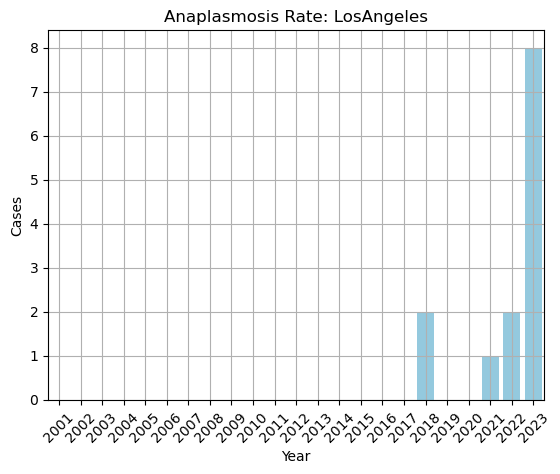

Los Angeles county has a case rate of 0 for Anthrax


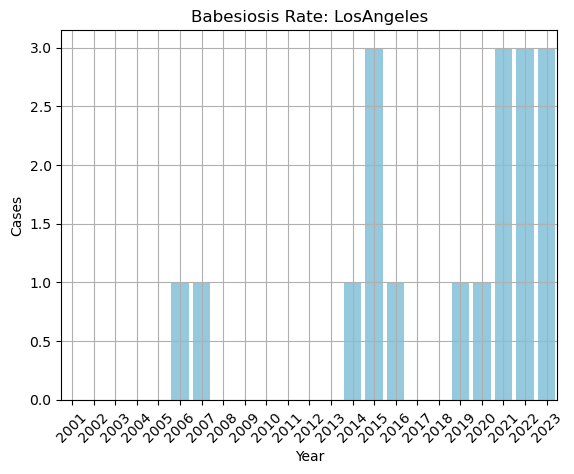

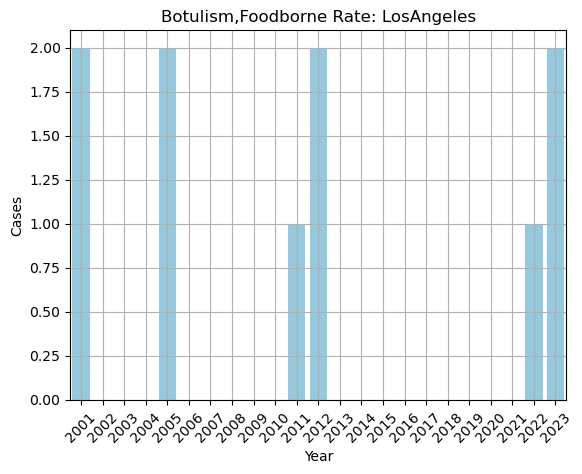

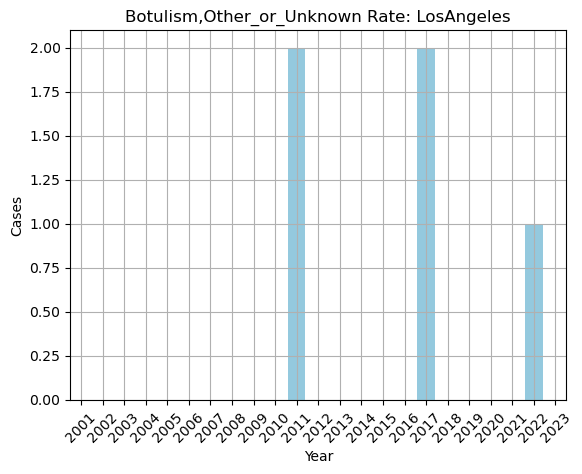

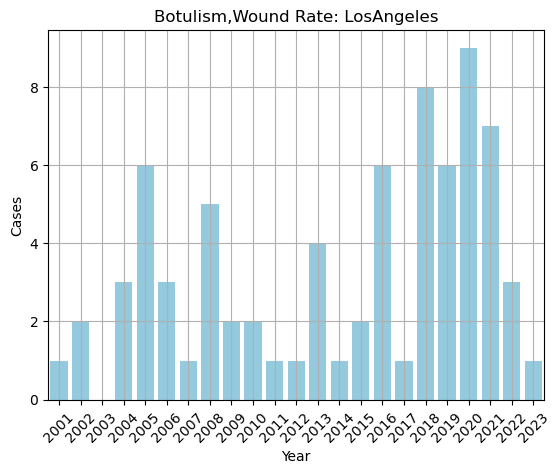

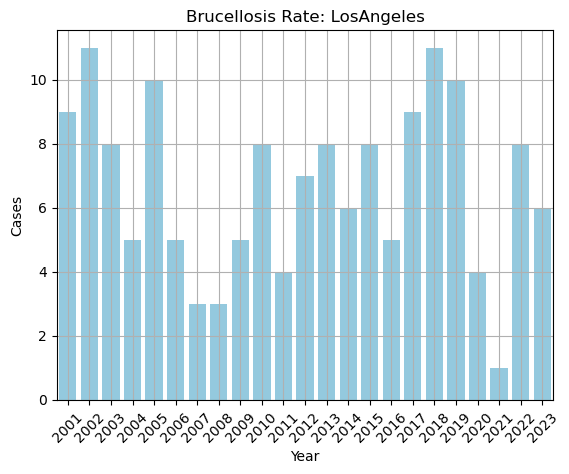

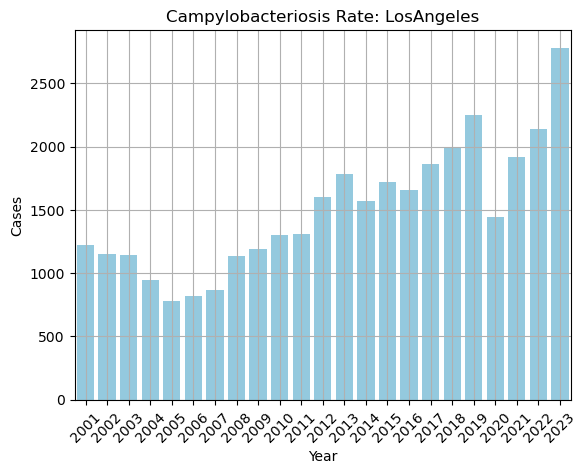

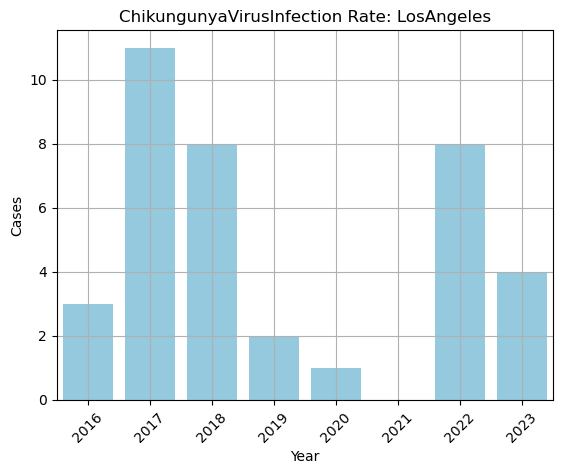

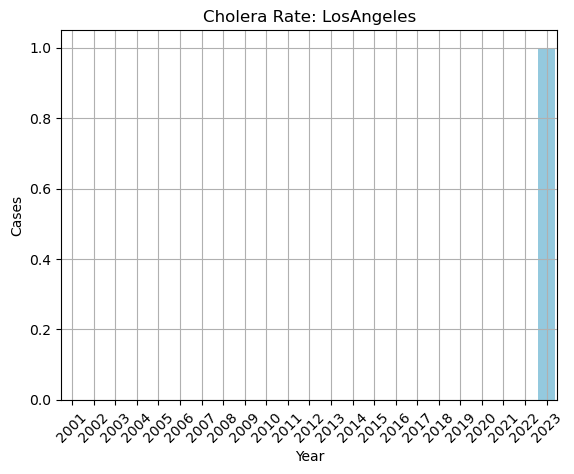

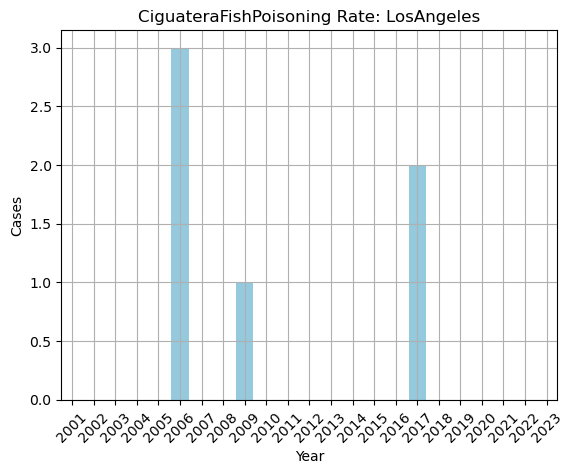

<Figure size 640x480 with 0 Axes>

In [244]:
# Definine the target county
target_county = "Los Angeles"

# Make plots of the disease rate pere year for this county
gain_disease_insight(target_county, df_total_rate, batch=False)

# 1. Making a disease prevalence plot per year for all of the counties


In [238]:
# Now that I have created a working function for making the plots, lets make plots for all counties
for target_county in list(df["County"].unique()):
    gain_disease_insight(target_county, df, batch=False)
    print("Plots made for target county: {}".format(target_county))

Alameda county has a case rate of 0 for Anthrax
Plots made for target county: Alameda
Alpine county has a case rate of 0 for Anaplasmosis
Alpine county has a case rate of 0 for Anthrax
Alpine county has a case rate of 0 for Babesiosis
Alpine county has a case rate of 0 for Botulism, Foodborne
Alpine county has a case rate of 0 for Botulism, Other/Unknown
Alpine county has a case rate of 0 for Botulism, Wound
Alpine county has a case rate of 0 for Brucellosis
Alpine county has a case rate of 0 for Chikungunya Virus Infection
Alpine county has a case rate of 0 for Cholera
Alpine county has a case rate of 0 for Ciguatera Fish Poisoning
Alpine county has a case rate of 0 for Coccidioidomycosis
Alpine county has a case rate of 0 for Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies
Alpine county has a case rate of 0 for Cryptosporidiosis
Alpine county has a case rate of 0 for Cyclosporiasis
Alpine county has a case rate of 0 for Cysticercosis or Taeniasis
Alpine 


KeyboardInterrupt

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x11274ab90>>
Traceback (most recent call last):
  File "/Users/chiral/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Error in callback <function flush_figures at 0x139f2f740> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [121]:
# zero_rate_diseases
# non_zero_rate_diseases[:30]